In [2]:
# Installing LaTeX.
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [129]:
# Importing networkx.
import networkx as nx

# Importing statistics.
import statistics

# Importing numpy.
import numpy as np

# Importing pyplot.
import matplotlib.pyplot as plt

# Importing time.
import time

# Using TeX.
plt.rc("text", usetex = True)

# Setting the font family.
plt.rc("font", family = "serif")

# Setting the font size.
plt.rcParams.update({"font.size": 15})

# Using package amsmath.
plt.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]

In [4]:
# Reading nodes file.
with open("nodes.txt") as f:
    nodes = f.readlines()

# Reading edges file.
with open("edges.txt") as f:
    edges = f.readlines()

# Reading nodes information file.
with open("gs_info.txt") as f:
    info = f.readlines()

# Casting nodes elements to integers.
nodes = [eval(i) for i in nodes]

# Casting edges elements to integer tuples.
edges = [eval(i) for i in edges]

# Replacing " " with ",".
info = [i.replace(" ", ",") for i in info]

# Casting info elements to integer tuples.
info = [eval(i) for i in info]

# Creating the list of dictionaries containing the nodes attributes.
info = [{"id": i[0], "total_number_of_citations": i[1], "h_index": i[2], "g_index": i[3], "academic_title": i[4], "computer_science_author": i[5], "biology_author": i[6], "sociology_author": i[7]} for i in info]

In [5]:
# Creating the graph.
G = nx.Graph()

# Adding nodes.
G.add_nodes_from(list(zip(nodes, info)))

# Adding edges.
G.add_edges_from(edges)

# Printing the number of nodes and edges.
G.number_of_nodes(), G.number_of_edges()

(402392, 1234019)

In [6]:
# Auxiliary function used to plot measures.
def plot(x, y, xlabel, ylabel, xlim, ylim, filename):
  fig, ax = plt.subplots(1, 1, figsize = (6, 4))
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.plot(x, y)
  fig.savefig(f"{filename}.pdf", bbox_inches = "tight")
  plt.show()

In [7]:
# Computing the list of nodes' degree.
degrees = [degree for (node, degree) in G.degree()]

# Plotting the average degree of network G.
print(f"The average degree of network G is: {sum(degrees) / len(degrees)}.")

The average degree of network G is: 6.1334171653512.


In [8]:
# Plotting the median value of the degrees in G.
print(f"The median value of the degrees in G is: {statistics.median(degrees)}.")

The median value of the degrees in G is: 2.0.


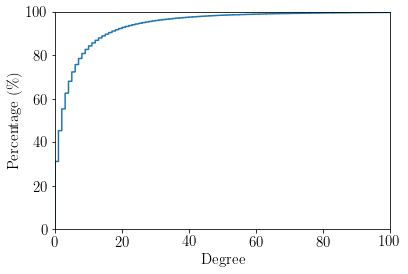

In [9]:
# Plotting the CDF of the degrees of G.
plot(np.sort(degrees), np.arange(len(degrees)) / float(len(degrees)) * 100, "Degree", r"Percentage (\%)", [0, 100], [0, 100], "CDF_degrees")

In [10]:
# Computing the list of nodes' clustering coefficient.
clustering_coefficients = list(nx.clustering(G).values())

# Plotting the average clustering coefficient of network G.
print(f"The average clustering coefficient of network G is: {np.sum(clustering_coefficients) / len(clustering_coefficients)}.")

The average clustering coefficient of network G is: 0.19784841407179343.


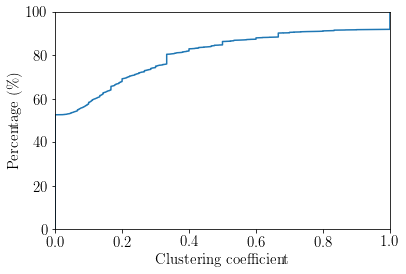

In [11]:
# Plotting the CDF of the clustering coefficients of G.
plot(np.sort(clustering_coefficients), np.arange(len(clustering_coefficients)) / float(len(clustering_coefficients)) * 100, "Clustering coefficient", r"Percentage (\%)", [0, 1], [0, 100], "CDF_clustering_coefficients")

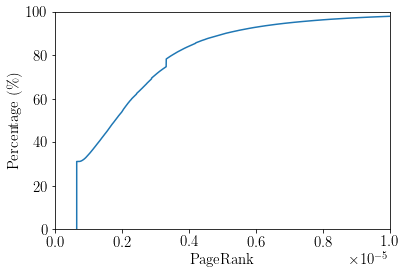

In [12]:
# Computing the list of nodes' pagerank.
pageranks = list(nx.pagerank(G).values())

# Plotting the CDF of the clustering coefficients of G.
plot(np.sort(pageranks), np.arange(len(pageranks)) / float(len(pageranks)) * 100, "PageRank", r"Percentage (\%)", [0, 1e-5], [0, 100], "CDF_pageranks")

In [13]:
# Printing the number of connected components.
print(f"The number of connected connected components is: {nx.number_connected_components(G)}.")

The number of connected connected components is: 133159.


In [73]:
# Computing all the connected components.
cc = [c for c in sorted(nx.connected_components(G), key = len, reverse = True)]

# Printing the size of the largest connected component.
print(f"The size of the largest connected component is: {len(cc[0])}.")

The size of the largest connected component is: 258949.


In [16]:
# Printing the size of the 2nd, 3rd, 4th and 5th connected component.
print(f"The 2nd to 5th largest connected components have {len(cc[1])}, {len(cc[2])}, {len(cc[3])}, and {len(cc[4])} nodes, respectively.")

The 2nd to 5th largest connected components have 14, 14, 13, and 13 nodes, respectively.


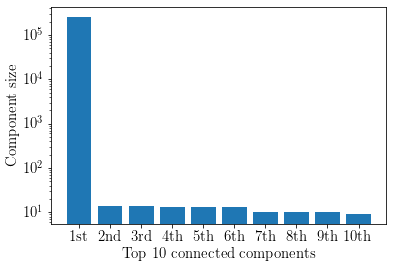

In [17]:
# Plotting the size of the first ten connected components.
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.set_xlabel("Top 10 connected components")
ax.set_ylabel("Component size")
ax.set_yscale("log")
ax.set_xticks(np.arange(0, 10, 1, dtype = int))
ax.set_xticklabels(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])
ax.bar(np.arange(0, 10, 1, dtype = int), [len(c) for c in cc[:10]])
fig.savefig(f"components_size.pdf", bbox_inches = "tight")
plt.show()

In [18]:
# Printing the number of singletons.
print(f"Among all connected components, {sum(len(c) == 1 for c in cc)} of them are singletons.")

Among all connected components, 125318 of them are singletons.


In [140]:
# Extracting the subgraph of G related to the largest connected component.
H = G.subgraph(list(cc[0]))

In [134]:
%%time

# Computing the first node's shortest path lengths.
_ = next(nx.all_pairs_shortest_path_length(H))

CPU times: user 6.41 s, sys: 22 ms, total: 6.43 s
Wall time: 6.46 s


In [141]:
# Defining the shortest path lengths generator.
generator = nx.all_pairs_shortest_path_length(H)

# Temporary variable used to store the number of used nodes.
n_nodes = 0

# Temporary list of shortest path lengths.
shortest_path_lengths = []

# Number of seconds for which to compute the shortest path lengths.
N_SECONDS = 600

# Starting a timer.
start = time.time()

# Iterating over the first 20 nodes of H.
while True:

  # Checking the timer.
  if time.time() - start >= N_SECONDS:

    # Breaking the loop if N_SECONDS seconds have passed.
    break

  # Computing the next node's shortest path lengths.
  path = next(generator)

  # Updating the number of considered nodes.
  n_nodes = n_nodes + 1

  # Updating the list of shortest path lengths.
  shortest_path_lengths.append(list(path[1].values()))

# Printing the average shortest path.
print(f"The average shortest path length is {np.sum(shortest_path_lengths) / (n_nodes * (len(path[1].values()) - 1))}.")

The average shortest path length is 5.926452941762966.


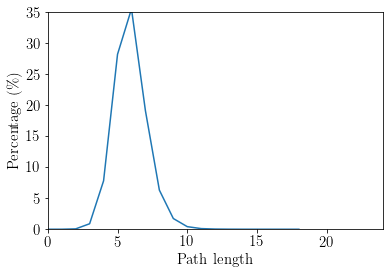

In [143]:
# Computing the unique values and their counts in shortest_path_lengths.
lengths, counts = np.unique(shortest_path_lengths, return_counts = True) 

# Plotting the distribution of path lengths.
plot(lengths, (counts / np.sum(counts)) * 100, "Path length", r"Percentage (\%)", [0, 24], [0, 35], "path_lengths_distribution")

In [137]:
# Computing the list of nodes' clustering coefficient.
clustering_coefficients = list(nx.clustering(H).values())

# Plotting the average clustering coefficient of network H.
print(f"The average clustering coefficient of network H is: {np.sum(clustering_coefficients) / len(clustering_coefficients)}.")

The average clustering coefficient of network H is: 0.2992787087577181.
